## Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read data into dataframe from csv

In [ ]:
file= "/content/drive/My Drive/ATM_withdrawal_data.csv"
import pandas as pd
data = pd.read_csv(file) 

In [ ]:
data.head()

,ID,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Near,Avg_Withdrawls_Per_Hour,ATM_Attached_to,Avg_No_of_Withdrawls_Per_Week,Average_Wait_Time,Day_Type,ATM_RATING,ATM_Prox,ATM_Since,Holiday_Sequence,AmountWithDrawn
0,TS000000001,66,RL,65,8450,Facing Road,Urban,Only WIthdraw,Normal,College,7,Building,856,3,Working,4,Attached to Branch,2008,WW,209500
1,TS000000002,26,RL,80,9600,Facing Road,Urban,Only WIthdraw,Normal,Temple,6,Building,1262,3,Working,3,Attached to Branch,2007,WW,184300
2,TS000000003,65,RL,68,11250,Facing Road,Town,Only WIthdraw,Normal,College,7,Building,920,3,Working,4,Attached to Branch,2008,WW,231500
3,TS000000004,80,RL,60,9550,Facing Road,Town,Only WIthdraw,Normal,Shopping Complex,7,Building,961,3,Working,4,2 ATM Machines (Same Bank),2006,HH,143600
4,TS000000005,66,RL,84,14260,Facing Road,Town,Only WIthdraw,Normal,Park,8,Building,1145,4,Working,4,Attached to Branch,2008,WW,255600


Checking the head of the data


In [ ]:
data.describe()

,Number_of_Shops_Around_ATM,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,Avg_Withdrawls_Per_Hour,Avg_No_of_Withdrawls_Per_Week,Average_Wait_Time,ATM_RATING,ATM_Since,AmountWithDrawn
count,186880.000000,186880.000000,186880.000000,186880.000000,186880.000000,186880.000000,186880.000000,186880.000000,186880.000000
mean,62.394542,69.978082,10516.828082,6.099315,1162.626712,2.866438,3.511644,2007.815753,186128.713549
std,42.389501,22.607480,9977.872801,1.382527,386.456356,0.815501,0.663534,1.327644,79466.216407
min,21.000000,21.000000,1300.000000,1.000000,334.000000,0.000000,2.000000,2006.000000,35400.000000
25%,27.000000,59.000000,7553.500000,5.000000,882.000000,2.000000,3.000000,2007.000000,135200.000000
50%,58.000000,70.000000,9478.500000,6.000000,1087.000000,3.000000,3.000000,2008.000000,168050.000000
75%,76.000000,80.000000,11601.500000,7.000000,1391.250000,3.000000,4.000000,2009.000000,218900.000000
max,200.000000,313.000000,215245.000000,10.000000,4692.000000,8.000000,5.000000,2010.000000,764900.000000


## Segregating numerical columns into different dataframe

In [ ]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Number_of_Shops_Around_ATM,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,Avg_Withdrawls_Per_Hour,Avg_No_of_Withdrawls_Per_Week,Average_Wait_Time,ATM_RATING,ATM_Since,AmountWithDrawn
0,66,65,8450,7,856,3,4,2008,209500
1,26,80,9600,6,1262,3,3,2007,184300
2,65,68,11250,7,920,3,4,2008,231500
3,80,60,9550,7,961,3,4,2006,143600
4,66,84,14260,8,1145,4,4,2008,255600


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plot


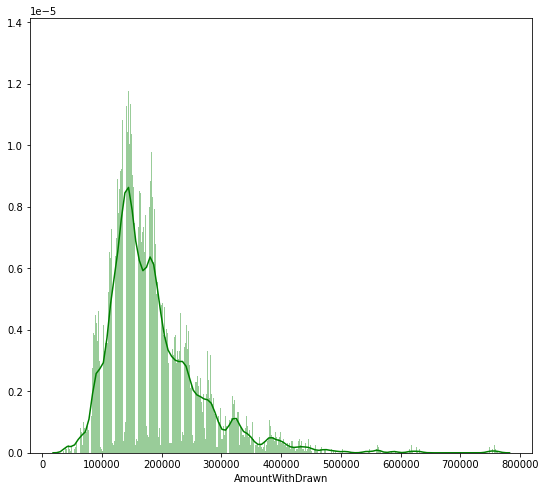

In [ ]:
plot.figure(figsize=(9, 8))
sns.distplot(data['AmountWithDrawn'], color='g', bins=9000, hist_kws={'alpha': 0.4});

### we can see that the AmountWithDrawn are skewed right and some outliers lies above ~500,000.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a75571e10>,
      dtype=object)

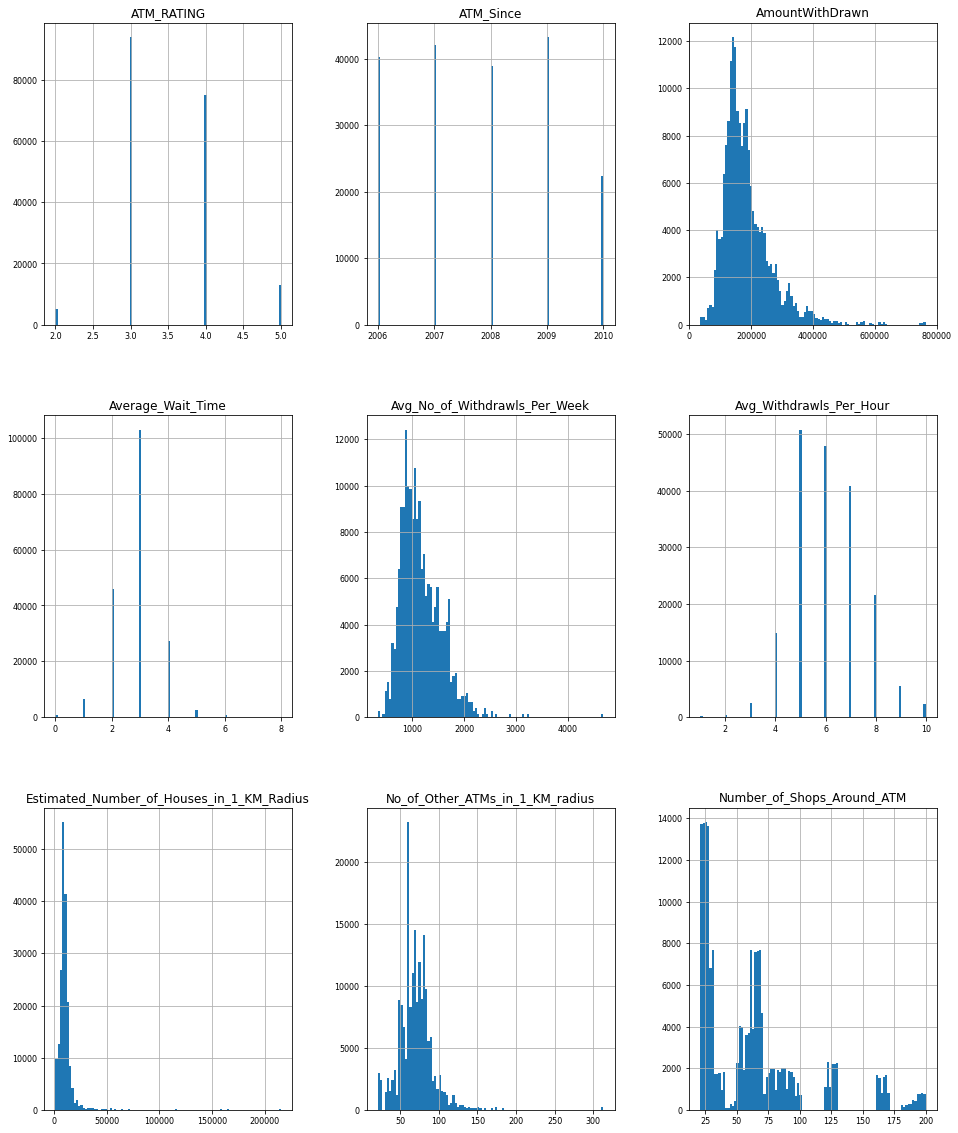

In [ ]:
df_num.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8) # ; avo



*   The average wait time is 3 for most of the datapoints.
*   Most of the atms are there since 2009.
*   Majority of the cases, there are 25 shops around the ATM
*   in most datapoints, 5 withdrawals happen per hour on an avg.







1.   Estimated number of houses in 1km has outliers above 50000. 
2.   Number of ATMS in 1 km radius has outliers above 150 
3. Average number of withdrawals per week have outliers above 2500 







The  distribution of the following is similar to the target variable:

1.   Average number of withdrawals per week
2.   estimated number of houses in 1 km radius
3.   number of other atms in 1 km radius 


In [ ]:
df_num.corr()

,Number_of_Shops_Around_ATM,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,Avg_Withdrawls_Per_Hour,Avg_No_of_Withdrawls_Per_Week,Average_Wait_Time,ATM_RATING,ATM_Since,AmountWithDrawn
Number_of_Shops_Around_ATM,1.000000,-0.350895,-0.139268,0.032382,-0.251100,-0.023204,-0.012355,-0.021225,-0.083815
No_of_Other_ATMs_in_1_KM_radius,-0.350895,1.000000,0.291242,0.223550,0.398492,0.226426,0.167771,0.010134,0.320702
Estimated_Number_of_Houses_in_1_KM_Radius,-0.139268,0.291242,1.000000,0.105806,0.299475,0.119690,0.067864,-0.014261,0.263735
Avg_Withdrawls_Per_Hour,0.032382,0.223550,0.105806,1.000000,0.476224,0.101676,0.673331,-0.027347,0.790368
Avg_No_of_Withdrawls_Per_Week,-0.251100,0.398492,0.299475,0.476224,1.000000,0.127401,0.387027,-0.013604,0.605477
Average_Wait_Time,-0.023204,0.226426,0.119690,0.101676,0.127401,1.000000,-0.018012,-0.036014,0.168120
ATM_RATING,-0.012355,0.167771,0.067864,0.673331,0.387027,-0.018012,1.000000,0.002047,0.659237
ATM_Since,-0.021225,0.010134,-0.014261,-0.027347,-0.013604,-0.036014,0.002047,1.000000,-0.028940
AmountWithDrawn,-0.083815,0.320702,0.263735,0.790368,0.605477,0.168120,0.659237,-0.028940,1.000000


In [ ]:
k=len(df_num.columns)
for i in range(0,k):
  df_num_corr = df_num.corr()[df_num.columns[i]][:-1]
  golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
  print("There is {} strongly correlated values with {}:\n{}".format(len(golden_features_list),df_num.columns[i], golden_features_list))
  print("\n")

There is 1 strongly correlated values with Number_of_Shops_Around_ATM:
Number_of_Shops_Around_ATM    1.0
Name: Number_of_Shops_Around_ATM, dtype: float64


There is 1 strongly correlated values with No_of_Other_ATMs_in_1_KM_radius:
No_of_Other_ATMs_in_1_KM_radius    1.0
Name: No_of_Other_ATMs_in_1_KM_radius, dtype: float64


There is 1 strongly correlated values with Estimated_Number_of_Houses_in_1_KM_Radius:
Estimated_Number_of_Houses_in_1_KM_Radius    1.0
Name: Estimated_Number_of_Houses_in_1_KM_Radius, dtype: float64


There is 2 strongly correlated values with Avg_Withdrawls_Per_Hour:
Avg_Withdrawls_Per_Hour    1.000000
ATM_RATING                 0.673331
Name: Avg_Withdrawls_Per_Hour, dtype: float64


There is 1 strongly correlated values with Avg_No_of_Withdrawls_Per_Week:
Avg_No_of_Withdrawls_Per_Week    1.0
Name: Avg_No_of_Withdrawls_Per_Week, dtype: float64


There is 1 strongly correlated values with Average_Wait_Time:
Average_Wait_Time    1.0
Name: Average_Wait_Time, dtype: 

We can infer that

1. **AmountWithDrawn** and **Avg_WIthdrawl_per_hr** haev strong correlation 0.790368

2.   **AmountWithDrawn** and **ATM_Rating** have strong correlation 0.659237
3.   **AmountWithDrawn** and **Avg_WIthdrawl_per_week** have strong correlation 0.605477

2.   **Average withdrawl per hr** and **ATM rating** have strong correlation 0.673331



### Correlation

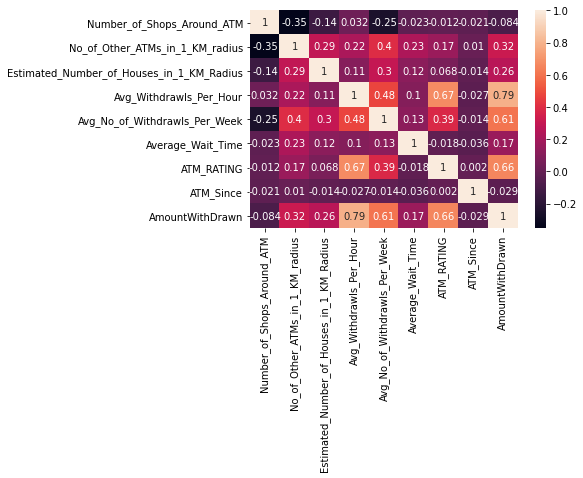

In [ ]:
correlation_matrix=df_num.corr()
sns.heatmap(correlation_matrix, annot=True)
plot.show()

### Heat map showing correlation.

<Figure size 1440x720 with 0 Axes>

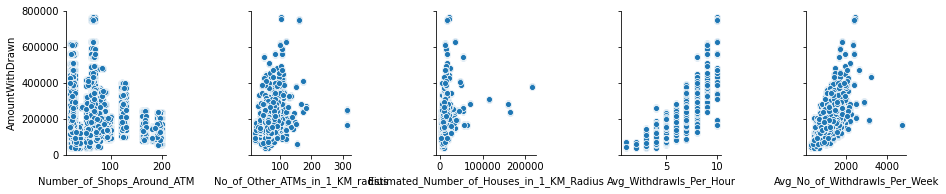

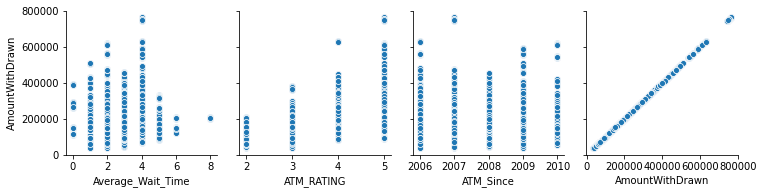

In [ ]:
fig = plot.figure(figsize = (20,10))
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['AmountWithDrawn'])

[link text](https://)

1.   avg_withdrwals_per_hour 
2.   atm rating
3.   avg_withdrwals per week 

has linear relationship with  amount withdrawn



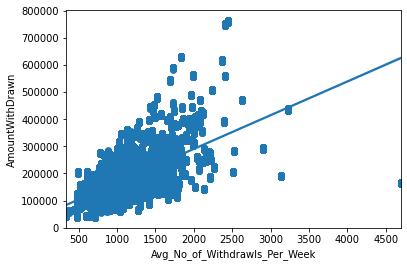

In [ ]:
figsize = (18, 12)

sns.regplot(x='Avg_No_of_Withdrawls_Per_Week',y='AmountWithDrawn', data=df_num)


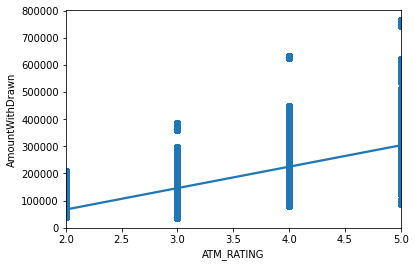

In [ ]:
sns.regplot(x='ATM_RATING',y='AmountWithDrawn', data=df_num)

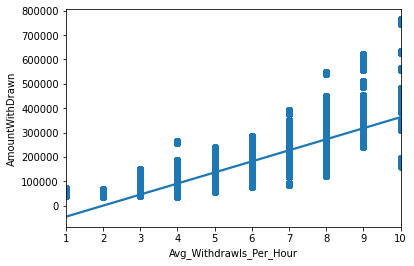

In [ ]:
sns.regplot(x='Avg_Withdrawls_Per_Hour',y='AmountWithDrawn', data=df_num)


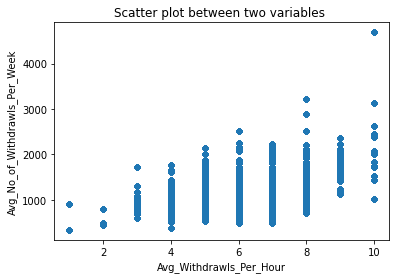

In [ ]:

data.plot.scatter(x='Avg_Withdrawls_Per_Hour', y='Avg_No_of_Withdrawls_Per_Week', title= "Scatter plot between two variables ")

plot.show()

LInear realtionship between avg withdrawal per hr and avg withdrawal per week


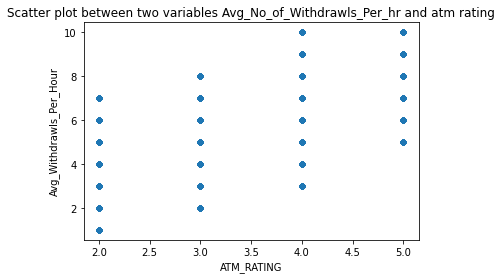

In [ ]:
data.plot.scatter(y='Avg_Withdrawls_Per_Hour', x='ATM_RATING', title= "Scatter plot between two variables Avg_No_of_Withdrawls_Per_hr and atm rating")
#plot.ylim(0,500000)
plot.show()

Linear relationship between avg no of withdrawal per hr and atm rating.

In [ ]:
ds_cat = data.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,ID,ATM_Zone,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Near,ATM_Attached_to,Day_Type,ATM_Prox,Holiday_Sequence
0,TS000000001,RL,Facing Road,Urban,Only WIthdraw,Normal,College,Building,Working,Attached to Branch,WW
1,TS000000002,RL,Facing Road,Urban,Only WIthdraw,Normal,Temple,Building,Working,Attached to Branch,WW


Separating Categorical Variables

In [ ]:
for i in ds_cat.columns:
  print(ds_cat[i].unique())

['TS000000001' 'TS000000002' 'TS000000003' ... 'TS000186878' 'TS000186879'
 'TS000186880']
['RL' 'RM' 'C' 'FV' 'RH']
['Facing Road' 'Little Inside']
['Urban' 'Town' 'Semi Urban' 'Bigger Towns']
['Only WIthdraw' 'Deposit and Withdraw' 'Checkdrop and Withdraw'
 'Passbook Printing and Withdraw']
['Normal' 'New' 'Old and Dull']
['College' 'Temple' 'Shopping Complex' 'Park' 'School' 'Railway Station'
 'Market' 'Residential' 'Office Area' 'Shops' 'Tourist Place' 'Highway'
 'Hospital' 'Upcoming Area' 'Bazzar' 'Church' 'Local Attraction'
 'Lodge and Hotel' 'Resturant and Bar' 'Food Joints' 'Govt Buildings'
 'IT park' 'Local Transport' 'Traffic Signal' '2+ ATMS Very Close'
 'Tasmac']
['Building' 'Petrol Bunk' 'Shop' 'House' 'Flat' 'Shed']
['Working' 'Festival' 'Strike' 'National Holiday']
['Attached to Branch' '2 ATM Machines (Same Bank)' 'Other Bank ATM '
 '2 ATMS in same Building' '2+ ATMS Very Close' 'Non Closed ATM']
['WW' 'HH' 'Long Weekend' 'WH' 'HW']


Finding unique value for each Categorical Variable

In [ ]:
ds_cat['AmountWithDrawn'] = data.loc[ds_cat.index, 'AmountWithDrawn'].copy()

BELOW WILL BE A SERIES OF COUNTPLOTS TO TELL WHICH TYPE OCCURS IN MOST DATPOINTS

Text(0.5, 1.0, 'ATM_TYPE')

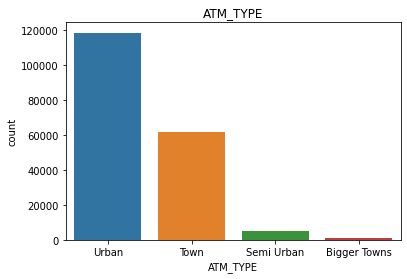

In [ ]:

sns.countplot(data = ds_cat, x = 'ATM_TYPE')
plot.title('ATM_TYPE')

Most atm types are Urban

Least atm types are bigger towns.


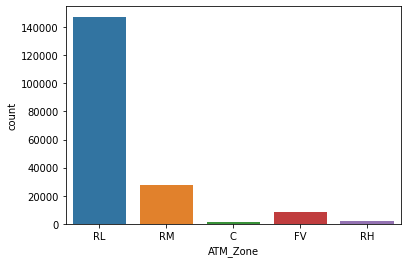

In [ ]:

sns.countplot(data = ds_cat, x = 'ATM_Zone')


Most Number of ATM zones are RL zone and the least is C zone.

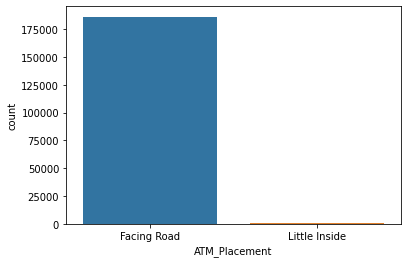

In [ ]:
sns.countplot(data = ds_cat, x = 'ATM_Placement')

MOST NUMBER of atms are : Facing Road

LEAST NUMBER of atms are :Little Inside

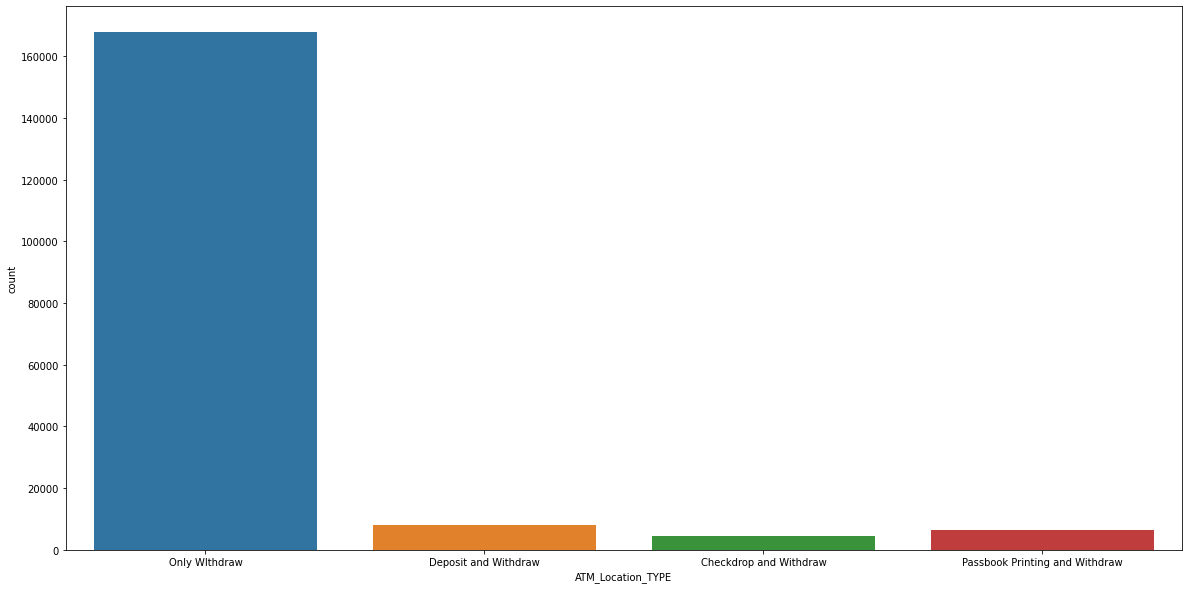

In [ ]:
fig = plot.figure(figsize = (20,10))
sns.countplot(data = ds_cat, x = 'ATM_Location_TYPE')

MOST NUMBER : Only Withdraw

LEAST NUMBER:Checkdrop and withdraw

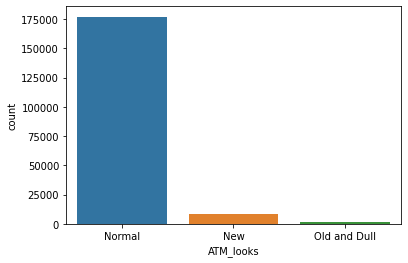

In [ ]:
#ATM_looks	ATM_Near	ATM_Attached_to	Day_Type	ATM_Prox	Holiday_Sequence
sns.countplot(data = ds_cat, x = 'ATM_looks')

MOST NUMBER  of atms look: Normal

LEAST NUMBER of atms look :Old and Dull

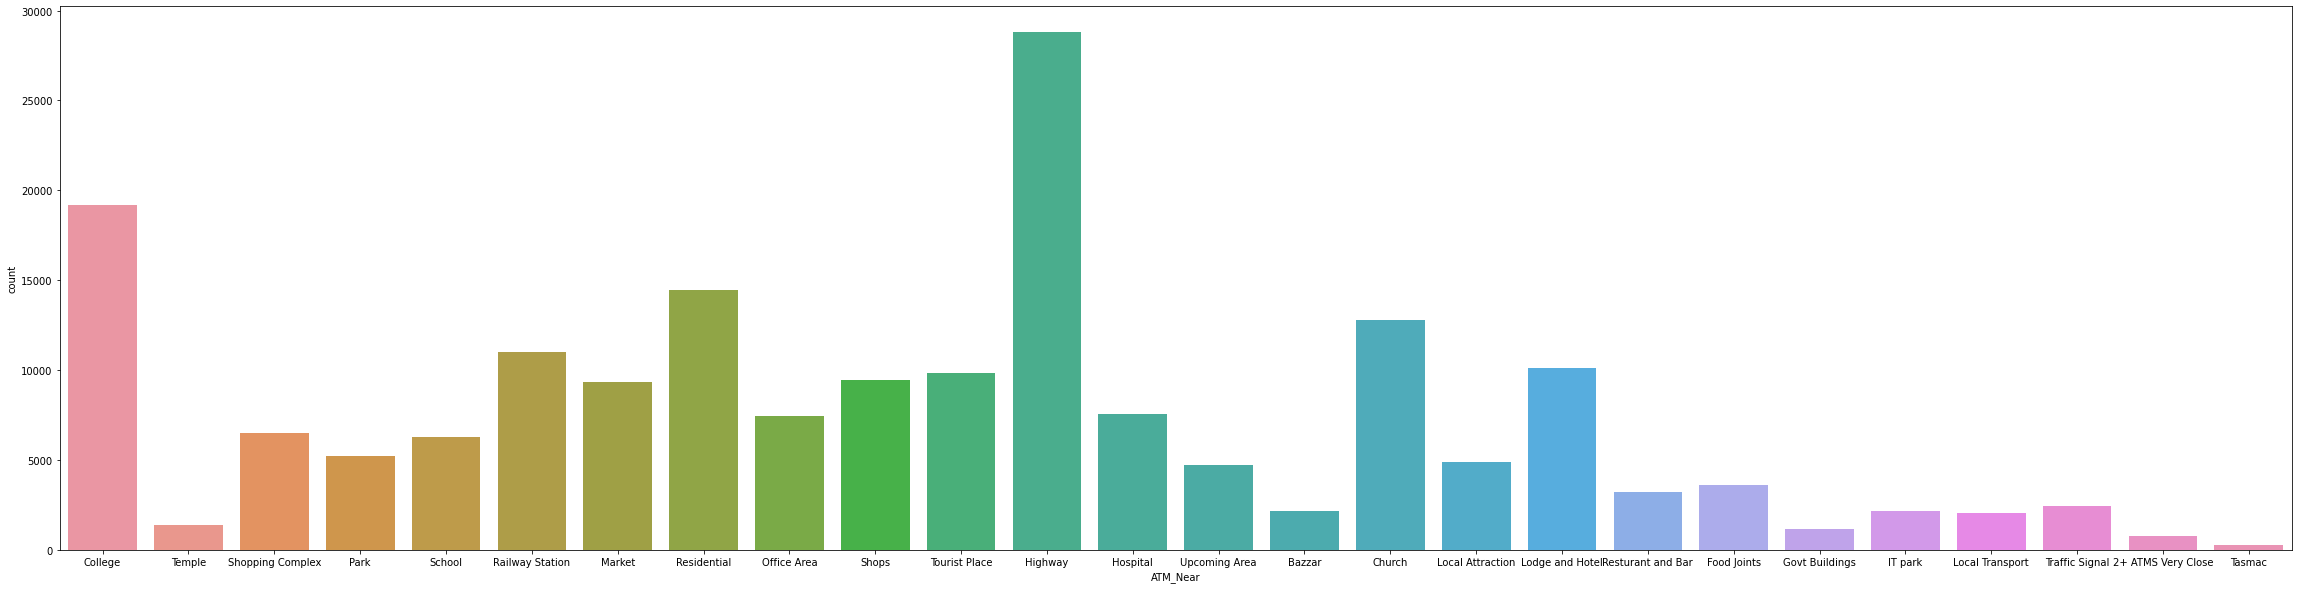

In [ ]:
fig = plot.figure(figsize = (40,10))
sns.countplot(data = ds_cat, x = 'ATM_Near')

MOST NUMBER  of atms are near : Highway

LEAST NUMBER of atms are near:=Tasmac

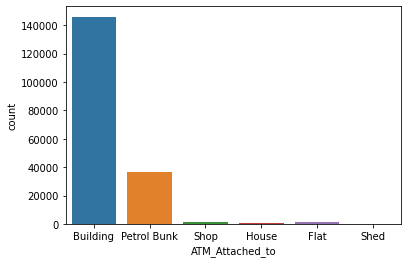

In [ ]:
sns.countplot(data = ds_cat, x = 'ATM_Attached_to')

MOST NUMBER of atms are attached to  : Building

LEAST NUMBER of atms are attached to a :Shed

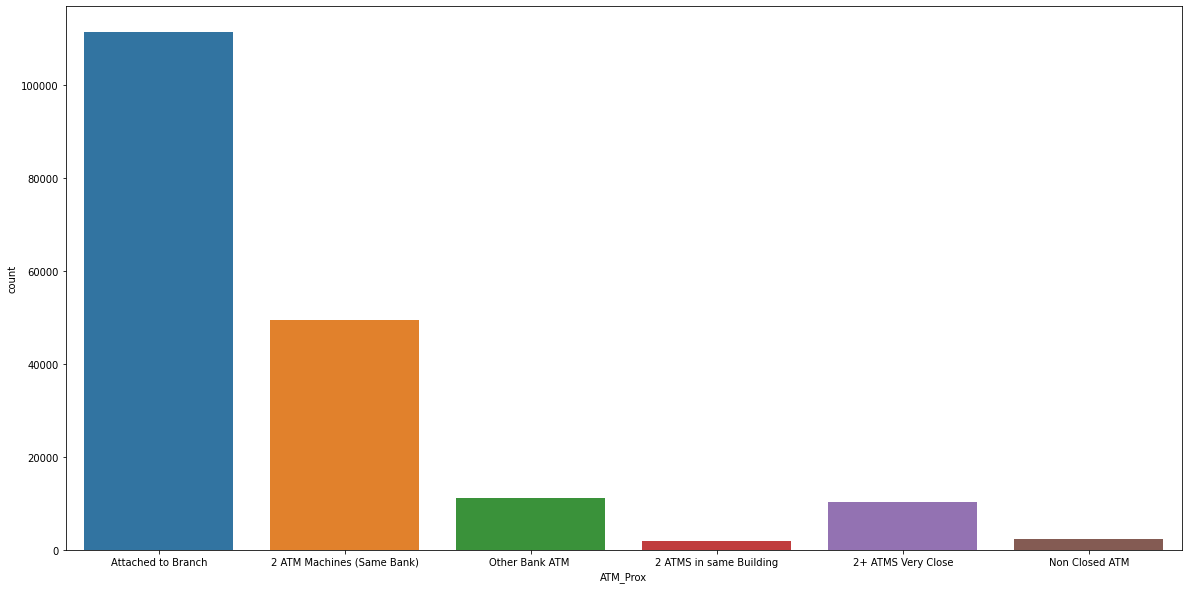

In [ ]:
fig = plot.figure(figsize = (20,10))
sns.countplot(data = ds_cat, x = 'ATM_Prox')

MOST NUMBER of atms are  Attached to Branch

LEAST NUMBER of atms have 2 ATMs in same building

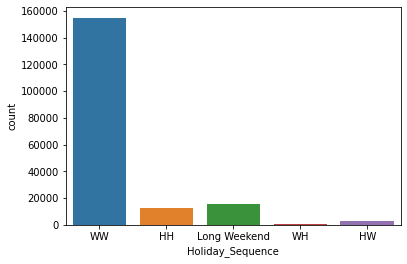

In [ ]:
sns.countplot(data = ds_cat, x = 'Holiday_Sequence')

MOST NUMBER of atm transactions happen during: WW

LEAST NUMBER of atm transactions happen during :WH

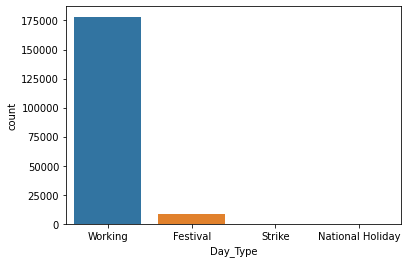

In [ ]:
sns.countplot(data = ds_cat, x = 'Day_Type')

MOST NUMBER  of atms function on : Working

LEAST NUMBER of atms function on National Holiday and strike

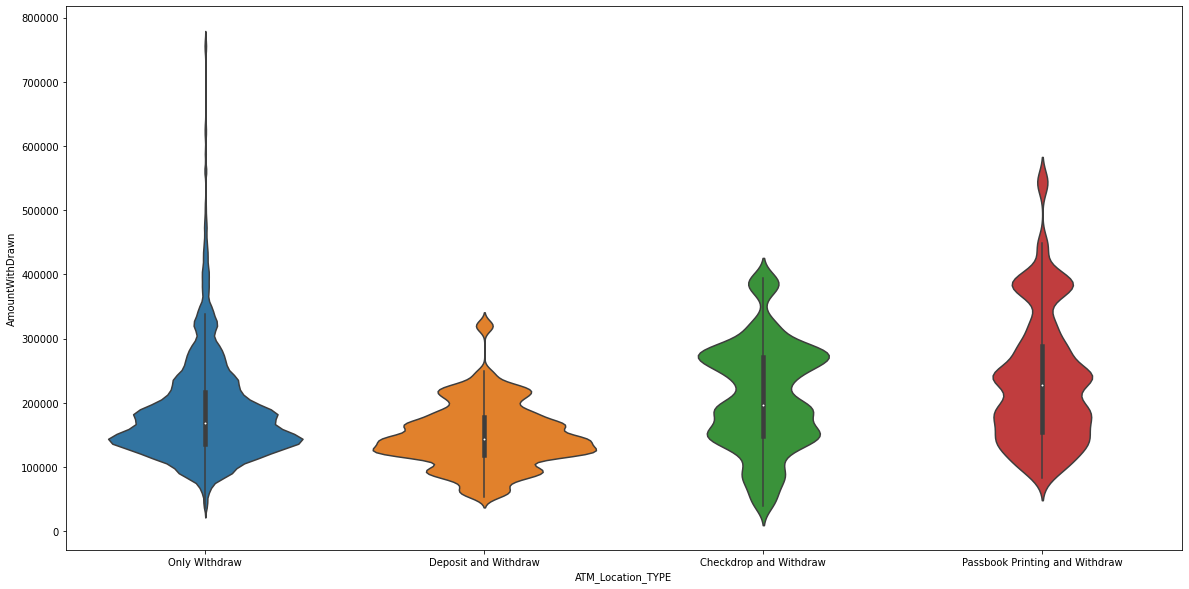

In [ ]:
import seaborn as sns
fig = plot.figure(figsize = (20,10))
sns.violinplot(data = ds_cat, x='ATM_Location_TYPE', y='AmountWithDrawn')


The highest avg amt withdrawn is when passbook printing and withdrawal is done together.

Only withrawal has a lot of outliers.

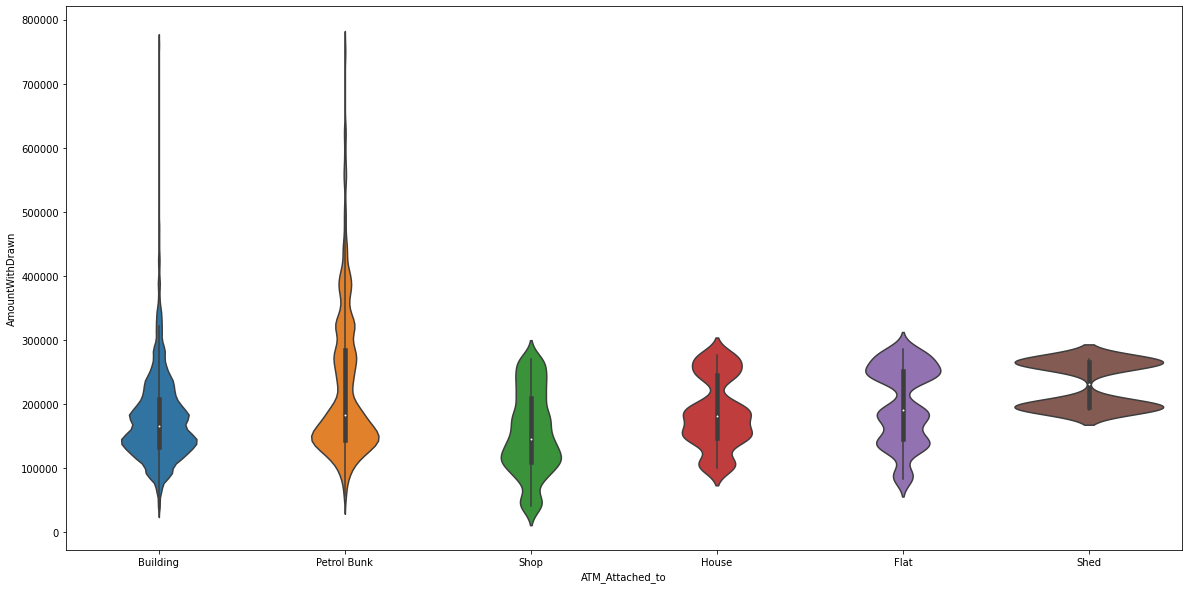

In [ ]:
fig = plot.figure(figsize = (20,10))
sns.violinplot(data = ds_cat, x='ATM_Attached_to', y='AmountWithDrawn')



*  Large amts are  withdrawn in atms attached to  Petrol Bunk,
 

*   the max amt withdawn is lowest for  atm attached to Shed



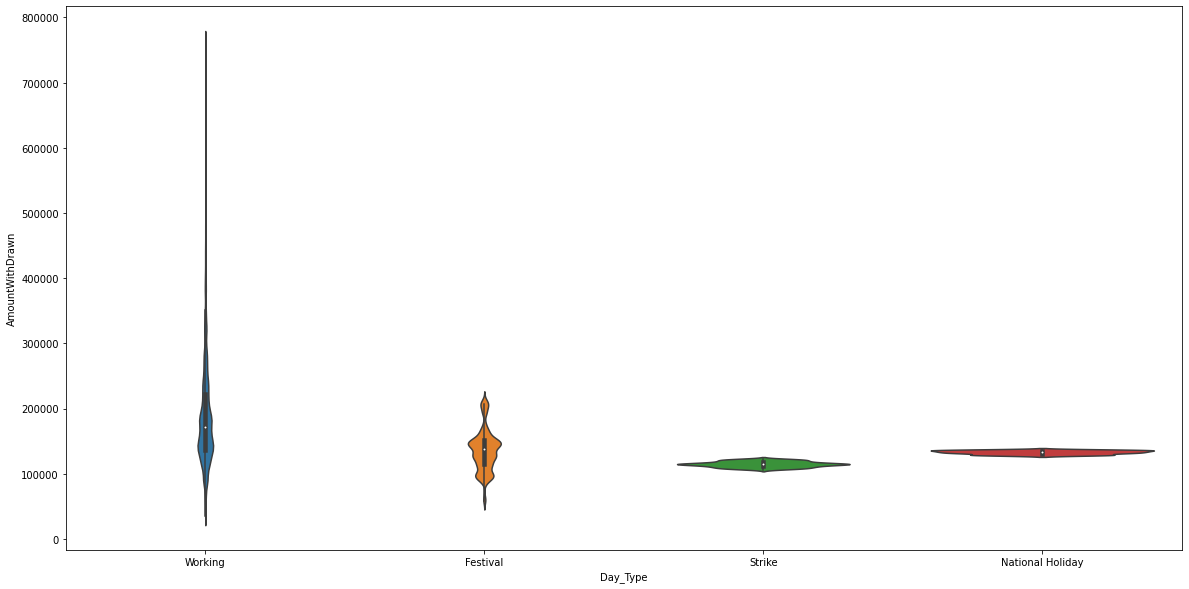

In [ ]:
fig = plot.figure(figsize = (20,10))
sns.violinplot(data = ds_cat, x='Day_Type', y='AmountWithDrawn')


1.    Large amt withdrawn : Working Day

2.  Least amt withdrawn : National Holiday and strikes




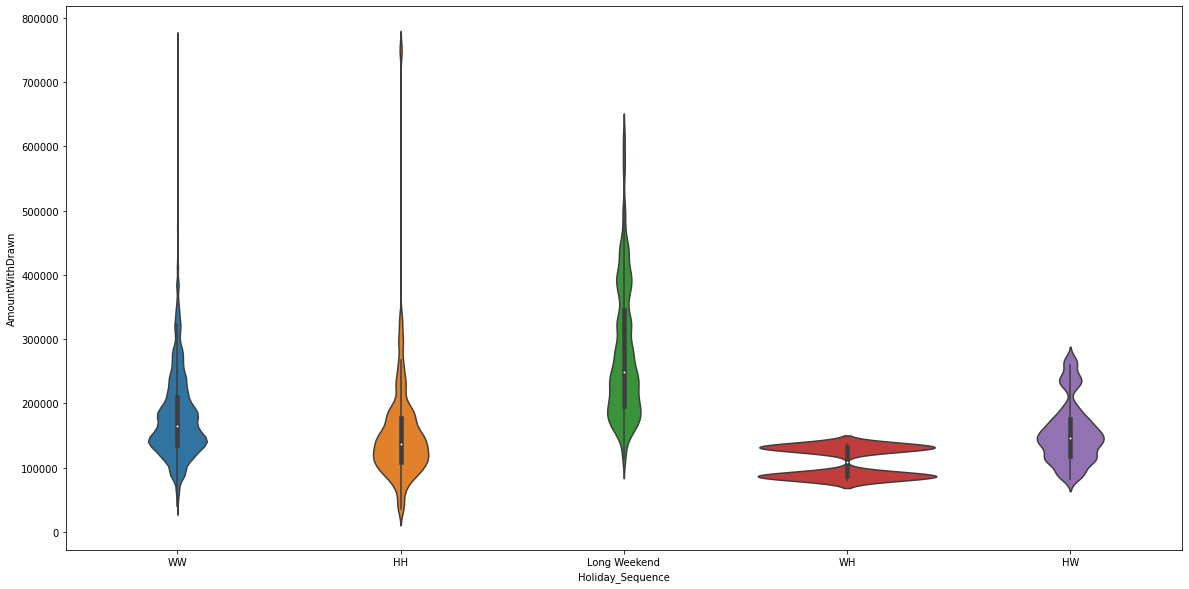

In [ ]:
fig = plot.figure(figsize = (20,10))
sns.violinplot(data = ds_cat, x='Holiday_Sequence', y='AmountWithDrawn')




*   for long weekends the minimum amount withdrawn is larger than fr the other holiday sequence.



*   max amount withdrawn is highest during a Long Weekend
*  max amount withdrawn is lowest during WH

WW and HH have too large outliers.



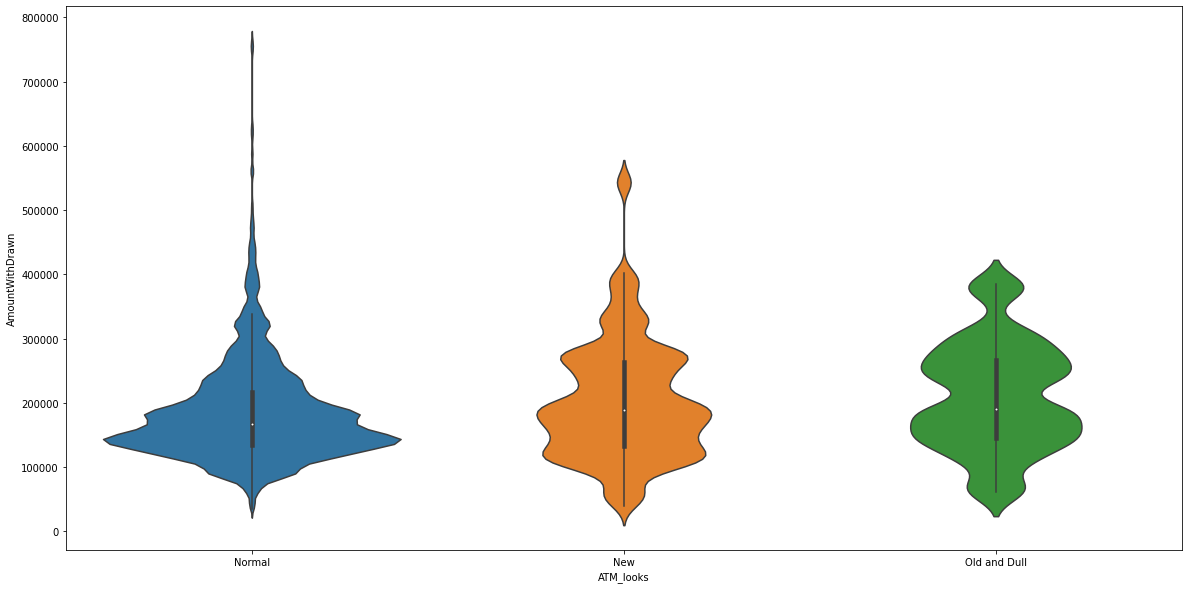

In [ ]:
fig = plot.figure(figsize = (20,10))
sns.violinplot(data = ds_cat, x='ATM_looks', y='AmountWithDrawn')
#sns.swarmplot(data = ds_cat, x='ATM_looks', y='AmountWithDrawn', color = 'k')



1.   Max amt withdrawn  is highest from New atms
2.  There are a lot of outliers present in Normal ATM 
3. For Normmal Atm density is more in the 100,000 to 200,000 region.



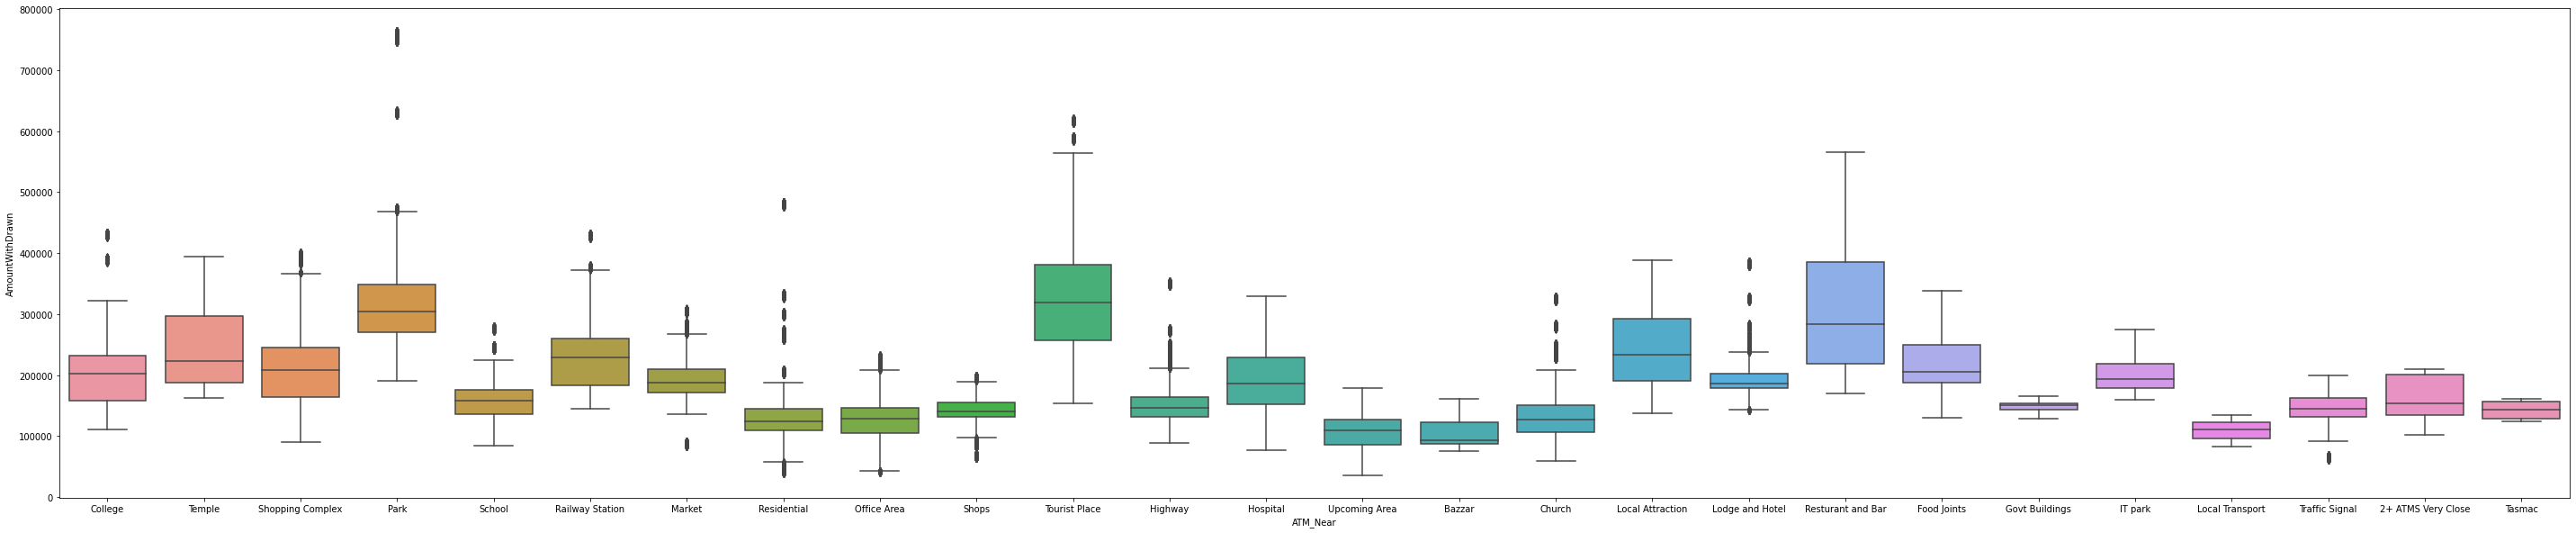

In [ ]:
fig = plot.figure(figsize = (50,10))
sns.boxplot(data = ds_cat, x='ATM_Near', y='AmountWithDrawn')

Max amt withdrawn is high for restaurant and  bar.
But the mean withdrawal amt is large for tourist place among all the other places.

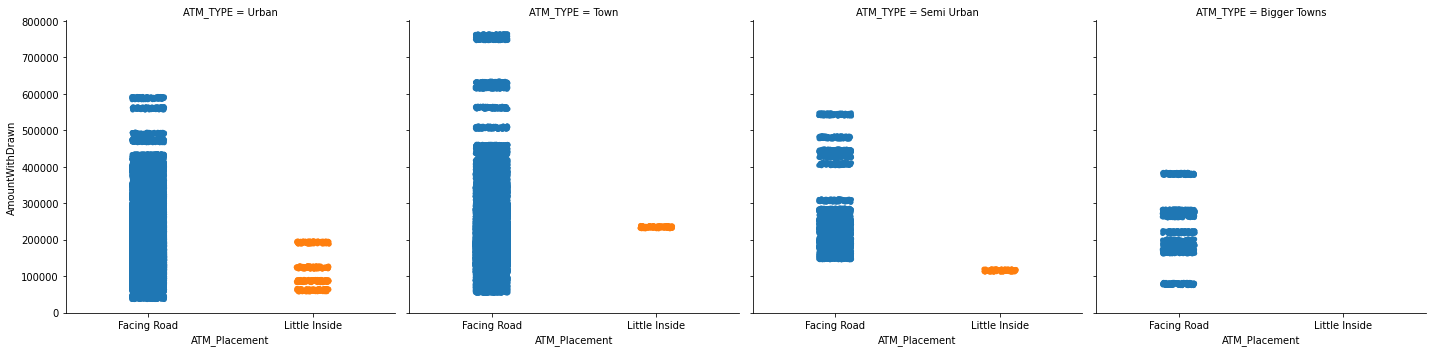

In [ ]:
g1 = sns.catplot(x="ATM_Placement",y="AmountWithDrawn", col="ATM_TYPE",
                data=ds_cat);

In all  ATM_TYPES atms that are facing the road the frequency of withdrawals and amt withdrawn is high

Also we can notice that in Bigger towns there are almost no atms that are little inside

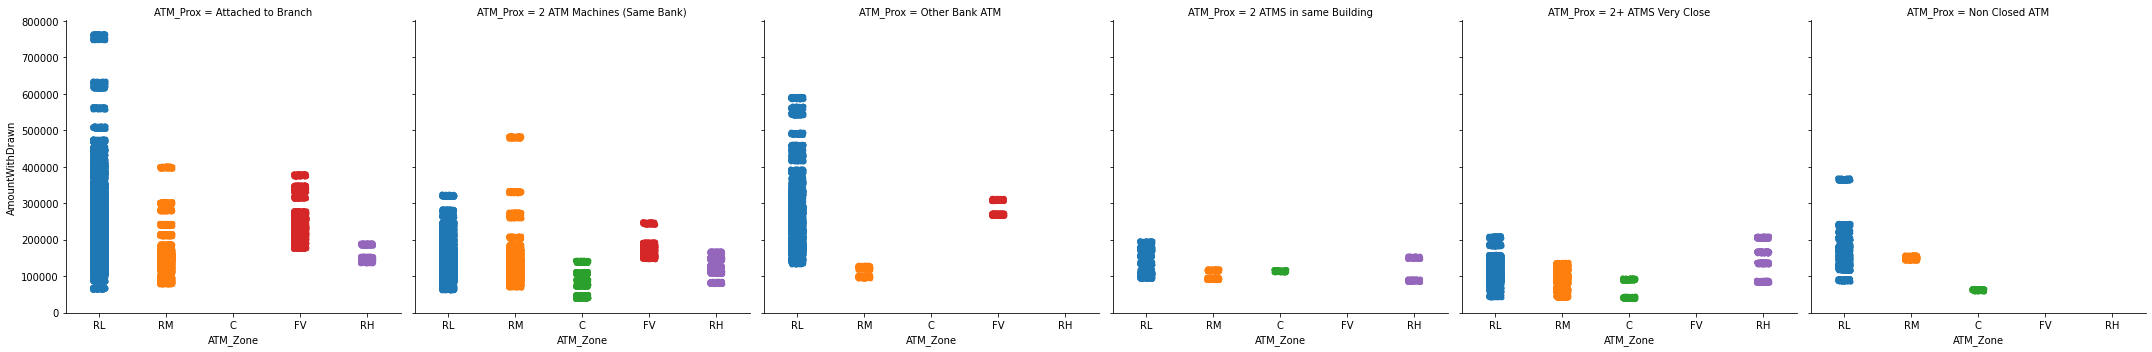

In [ ]:
g1 = sns.catplot(x="ATM_Zone",y="AmountWithDrawn", col="ATM_Prox",
                data=ds_cat);


for all atm_proximities  amount withdrawn is high for RL 

Also  ATM_Zone =C is not present for  atm_proximity = atms attached to branch  and 2 ATMS in the same building

ATM_Zone =FV is not present for atm_proximity= non closed atm and 2 ATMS in the same building.

ATM_Zone =RH is not present for atm_proximity=non closed atm and other bank atm.


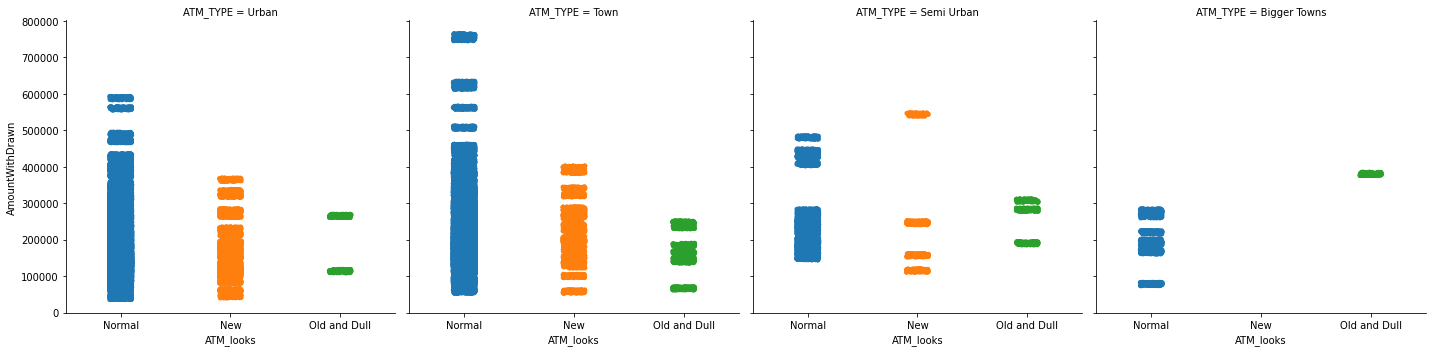

In [ ]:
g1 = sns.catplot(x="ATM_looks",y="AmountWithDrawn", col="ATM_TYPE",
                data=ds_cat)

For all the given Atm types highest withdrawal happens in normal atms

the second highest is new atms

and the third is old and dull atms



*   also noticeable that number of old atm is the least in bigger towns and most in towns.


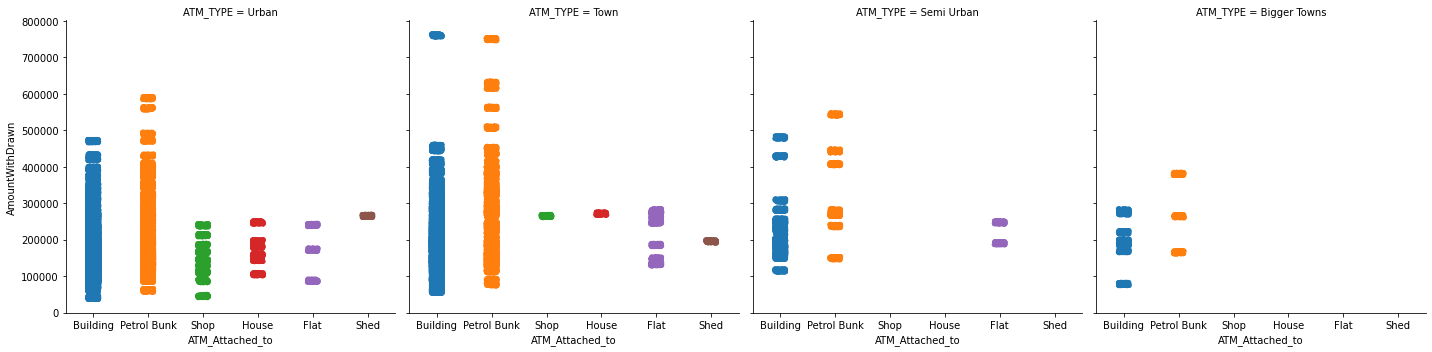

In [ ]:
g1 = sns.catplot(x="ATM_Attached_to",y="AmountWithDrawn", col="ATM_TYPE",
                data=ds_cat)

Withdrawal frm petrol bunk is highest in all atm types

in semi urban atm types withdrawal is negligible for atm attached to shop ,house and shed

in bigger towns atm types withdrawal is negligible for atm attached to shop,house,flat,shed

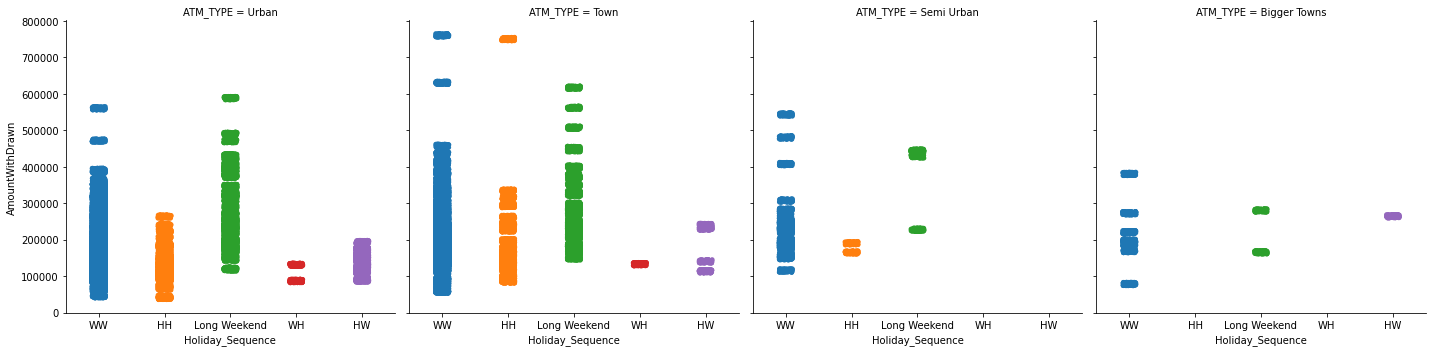

In [ ]:
g1 = sns.catplot(x="Holiday_Sequence",y="AmountWithDrawn", col="ATM_TYPE",
                data=ds_cat)



*   For a Long weekend the least amount withdrawn is higher than for all the other Holiday sequences.


*   Urban and normal towns withdraw more money than the others
*   amont withdrawn during WH is lowest for all atm types and non existent in semi urban and bigger towns.




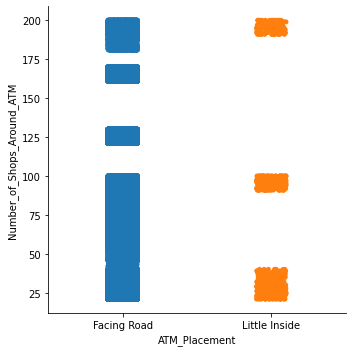

In [ ]:
g1 = sns.catplot(x="ATM_Placement",y="Number_of_Shops_Around_ATM",
                data=data)



*   ATM that are little inside have lesser shops near them
*   ATM that are facing road have many shops near them



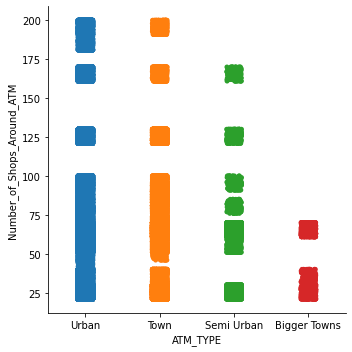

In [ ]:
g1 = sns.catplot(x="ATM_TYPE",y="Number_of_Shops_Around_ATM",
                data=data)

We can see Urban atm types have more shops around the atm and bigger towns have the least.

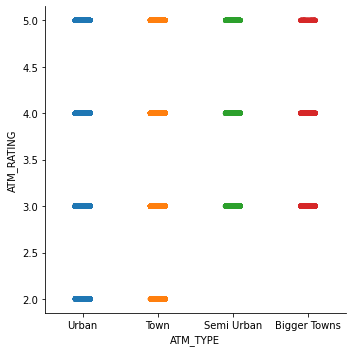

In [ ]:

g1 = sns.catplot(x="ATM_TYPE",y="ATM_RATING",
                data=data)

bigger town and semi urban atm types  have rating >=3.0

for the rest it is the same

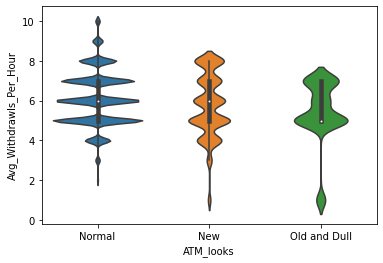

In [ ]:
g1 = sns.violinplot(x="ATM_looks",y="Avg_Withdrawls_Per_Hour",
                data=data)

so here we see avg withdrawls per hr is low for Old and dull atms


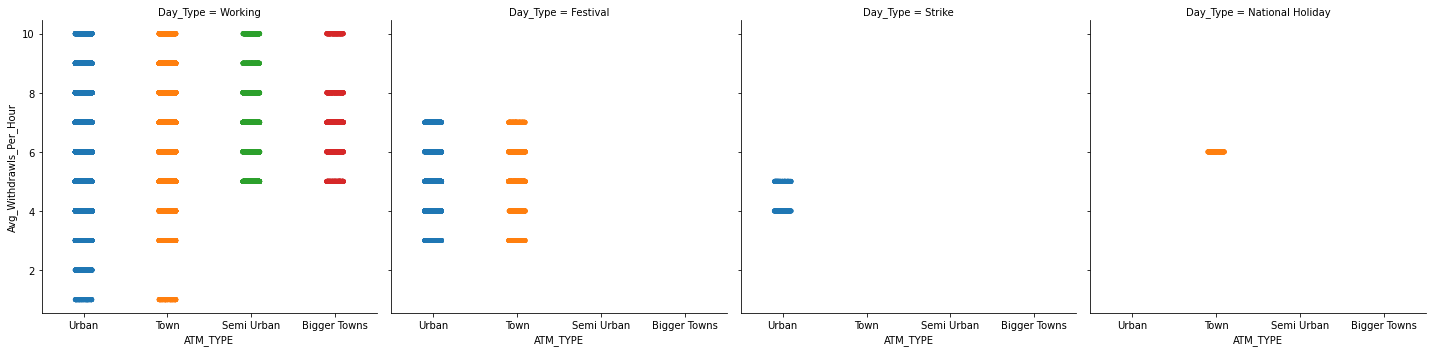

In [ ]:


g1 = sns.catplot(x="ATM_TYPE",y="Avg_Withdrawls_Per_Hour",col="Day_Type",
                data=data)

avg withdrawals per hour is most for working days and especially in urban and town atm types

festivals-semi urban and bigger towns is negligible

strike and national holidays its low for all atm types

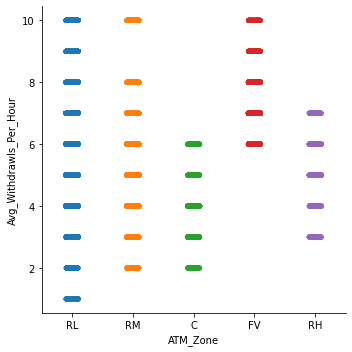

In [ ]:
g1 = sns.catplot(x="ATM_Zone",y="Avg_Withdrawls_Per_Hour",
                data=data)

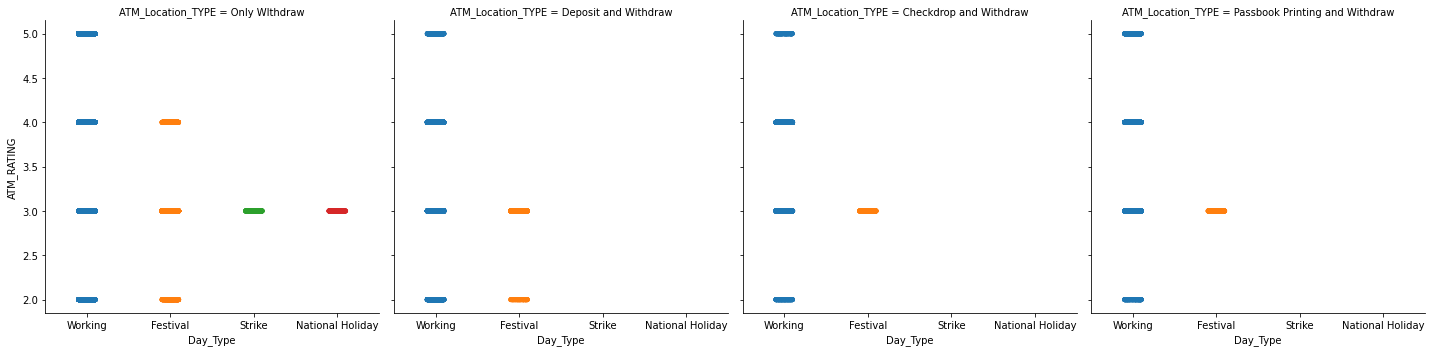

In [ ]:


g1 = sns.catplot(x="Day_Type",y="ATM_RATING",col="ATM_Location_TYPE",
                data=data)

During National Holidays and strikes,only withdrawal happens from atms rated 3

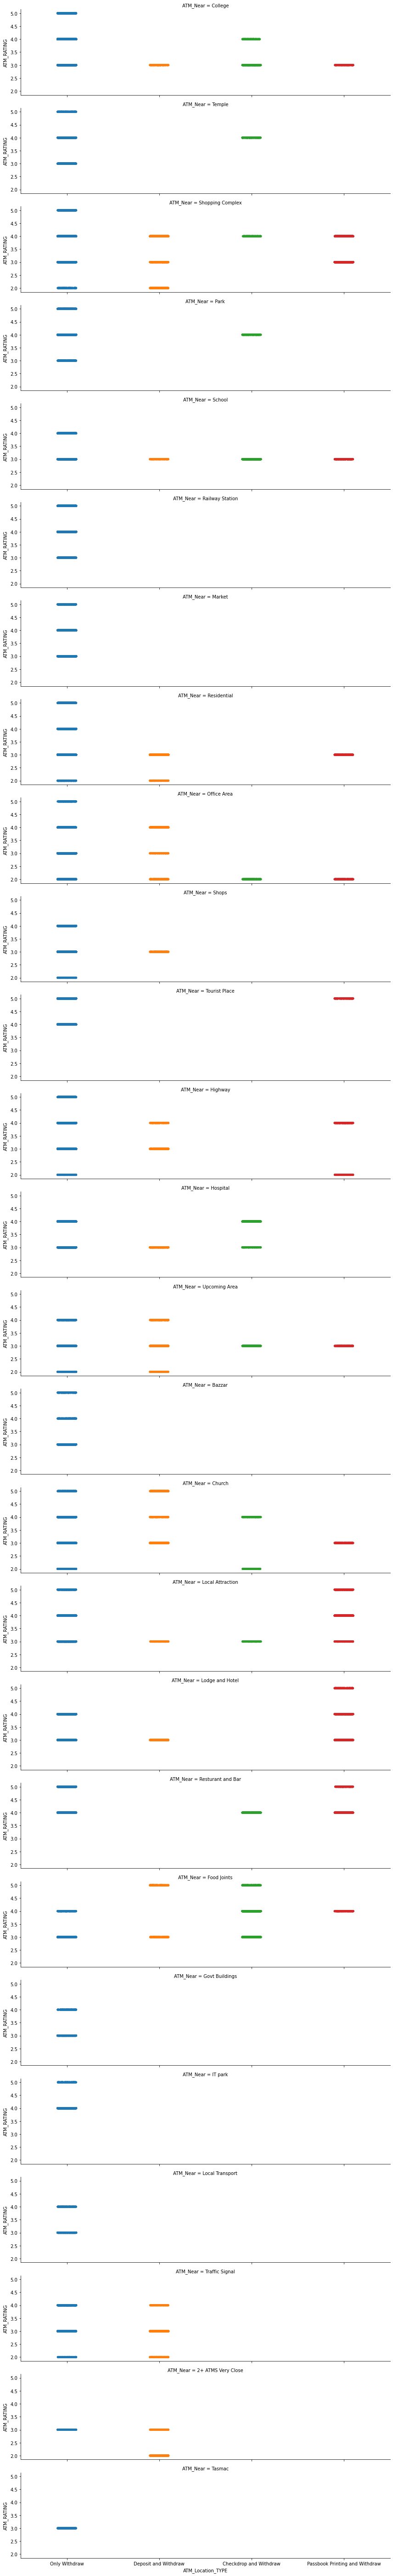

In [ ]:

g1=sns.catplot(row="ATM_Near",y="ATM_RATING",x="ATM_Location_TYPE",
                data=data,height=3,aspect=4)



Atm rating for atm near tasmac is the 3.0 lower than the other categories and only withdrawal happens in these atms.

atms near local transport,govt buildings,market,railway station,bazzar and it park only withdrawals happen

